<a href="https://colab.research.google.com/github/Srijan-Rai/CardioVascularRiskPrediction/blob/main/Cardiovascular_Risk_Prediction(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. 

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# mounting the drive to obtain the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset
path = "/content/drive/My Drive/Colab Notebooks/Cardiovascular Risk Prediction(Classification Project)/data_cardiovascular_risk.csv"
df= pd.read_csv(path)

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **Dataset Columns**

The dataset consists of the following columns:

Demographic:
*   **Sex**: male or female("M" or "F")
*   **Age**: Age of the patient
*   **Education** : Education of the patient

Behavioral:
*   **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
*   **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day

Medical( history):
*   **BP Meds**: whether or not the patient was on blood pressure medication
*   **Prevalent Stroke**: whether or not the patient had previously had a stroke
*   **Prevalent Hyp**: whether or not the patient was hypertensive
*   **Diabetes**: whether or not the patient had diabetes

Medical(current):
*   **Tot Chol**: total cholesterol level
*   **Sys BP**: systolic blood pressure
*   **Dia BP**: diastolic blood pressure
*   **BMI**: Body Mass Index
*   **Heart Rate**: heart rate
*   **Glucose**: glucose level

Predict variable:
*   **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”)

















## Exploratory Data Analysis

### Head and Tail

In [ ]:
# Head of the data frame
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Tail of the data frame
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Statistical Info

In [ ]:
# Basic information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

From the above information, we can say,
1.   Except sex and is_smoking, all the features contain numeric values.
2.   There are total 3390 entries and 17 features including the target feature i.e the TenYearCHD.
3. Some of the features contains NAN or missing values which needs to be handled.



In [ ]:
# Get statistical data for the numeric features
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


* The above statistical data provides us with the mean, minimum value, maximum value, and also the data distribution for the features that contain numeric values.
* By looking into the data we can say that some of the features like, "cigsperDay", "totChol", "glucose" etc., may contain some outliers that should be handled accordingly.


### Remove Duplicate rows

In [ ]:
# Total duplicate rows in the dataframe
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(keep ="first", inplace = True)

There are no duplicates in the dataframe

### Handling Null/NAN Values

In [ ]:
#check for NAN/Null values
Percentage_null_value = (df.isna().sum()/df.isna().count()*100).sort_values(ascending= False).reset_index()
Percentage_null_value.columns = ["Features","Percentage Null Values"]
Percentage_null_value

,Features,Percentage Null Values
0,glucose,8.967552
1,education,2.566372
2,BPMeds,1.297935
3,totChol,1.120944
4,cigsPerDay,0.648968
5,BMI,0.412979
6,heartRate,0.029499
7,id,0.000000
8,diaBP,0.000000
9,sysBP,0.000000


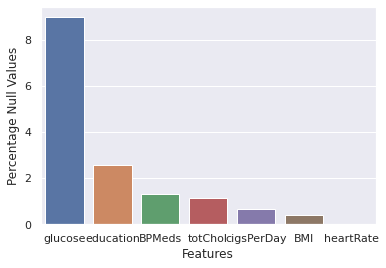

In [ ]:
# Plotting the percentage null values in different features
Percentage_null_value = Percentage_null_value[Percentage_null_value["Percentage Null Values"]>0]
sns.barplot(x= Percentage_null_value["Features"] , y= Percentage_null_value["Percentage Null Values"])

From the above data frame we can see the total number of nan values present in the dataframe. These entries must be dropped or imputed with necessary values.

Since gluce has the hoghest NAN values, we would impute the NAN values with its measure of central tendancy. 

And the rest of the features has very low number of NAN values. We would drop these values as it might not cause any significant affect on the data.

We would use KNN imputation to fill these NAN values with their appropriate values.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df["glucose"] = imputer.fit_transform(df["glucose"].values.reshape(-1,1))

In [ ]:
df.dropna(axis =0 , inplace = True)
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Handling Outliers

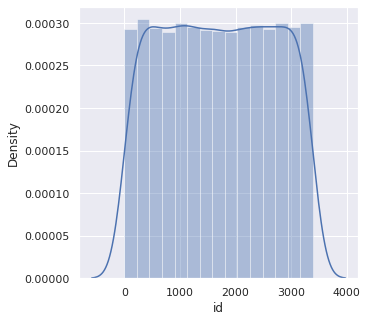

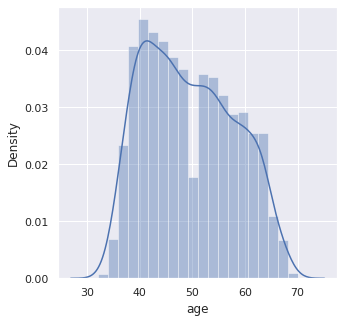

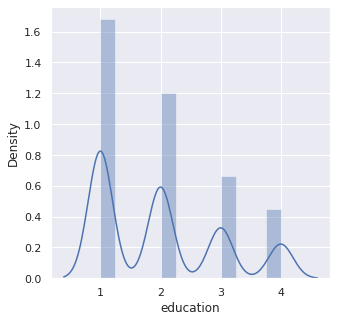

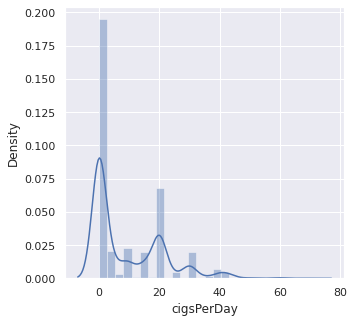

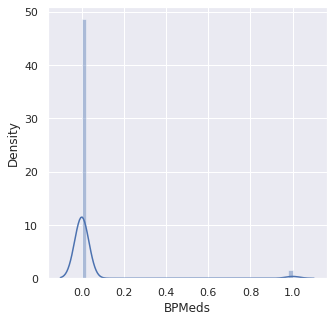

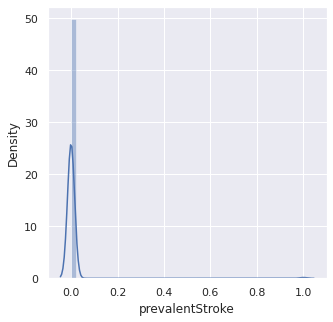

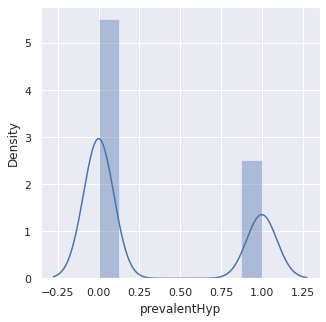

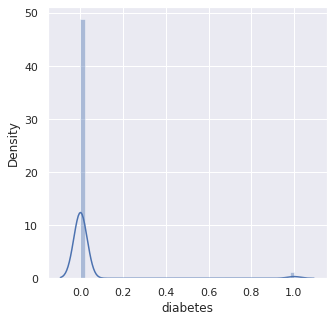

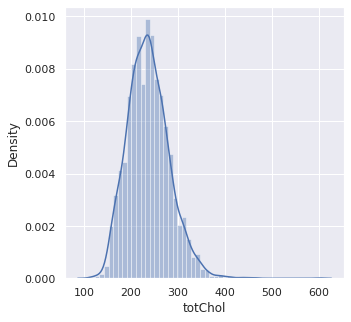

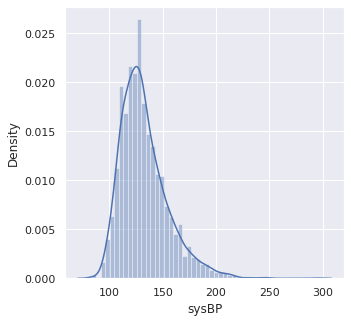

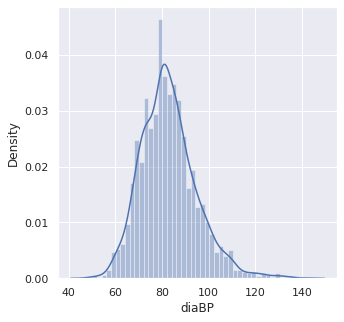

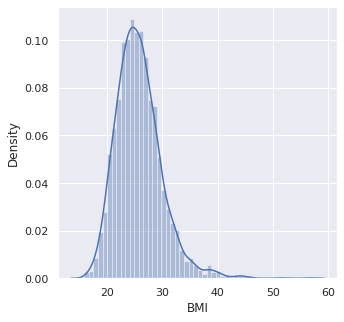

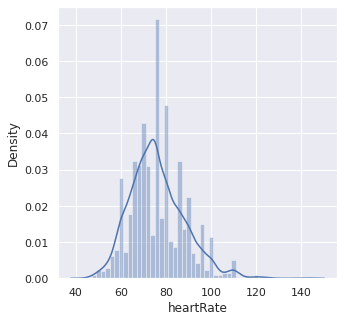

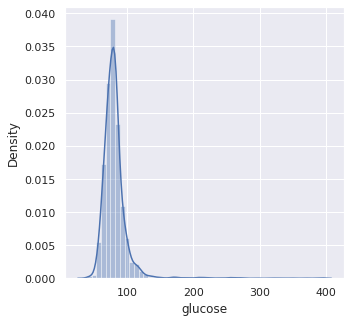

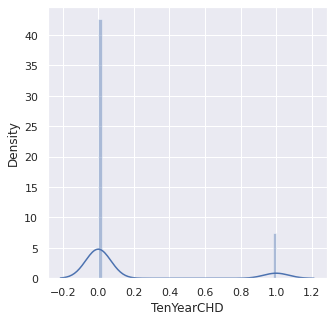

In [ ]:
# Distribution plots for different features
for column in df.describe().columns:
  plt.figure(figsize=(5,5))
  sns.distplot(df[column])

From the above distribution plots, we can see that there are some outliers present in some features. Let us visualize these features through box plots to gain some more insights into the outliers.

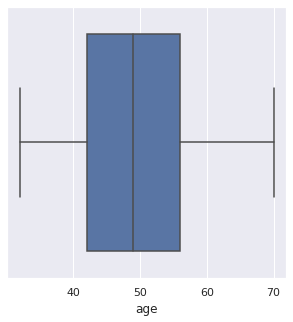

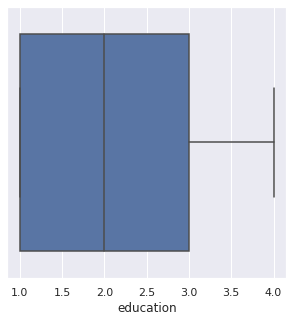

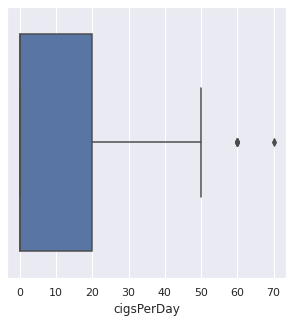

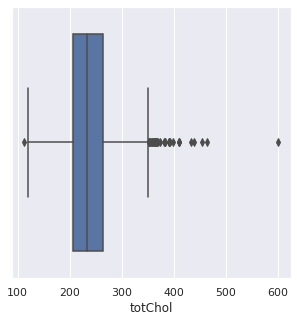

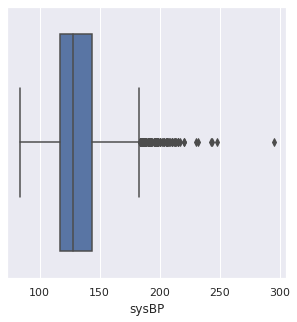

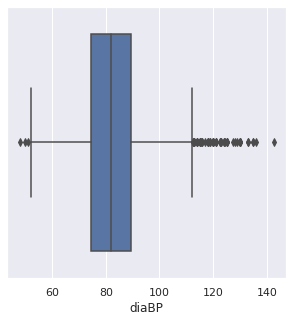

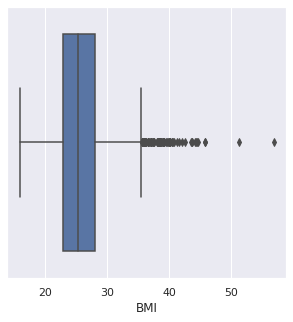

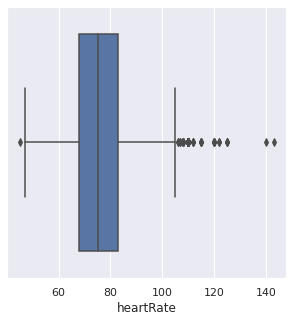

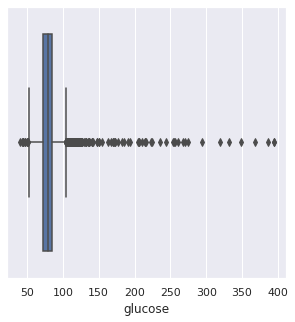

In [ ]:
# outlier detection
# Use necessary features for outlier detection
outlier_features = df[["age","education","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
for column in outlier_features:
  plt.figure(figsize=(5,5))
  sns.boxplot(outlier_features[column])

From the above boxplots let us drop all the data which is differs significantly from the other values.

In [ ]:
outliers = {"cigsPerDay":50, "totChol":500, "sysBP":250, "diaBP":140, "BMI":50, "heartRate":140}
for feature, outlier_value in outliers.items():
  df = df[df[feature]<outlier_value]

### Data Visualization

0    2700
1     469
Name: TenYearCHD, dtype: int64


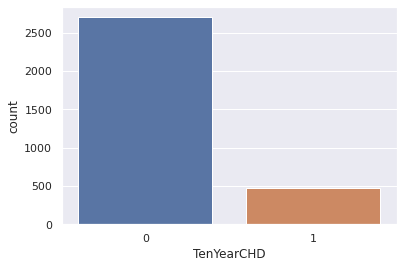

In [ ]:
# Cases count
sns.countplot(x='TenYearCHD',data=df)
print(df["TenYearCHD"].value_counts())

As from the above barplot, we can see a huge data imbalance between the two classes of TenYearCHD.

This imbalance of data needs to be handled, otherwise the model we build for this data will perform better only on the class with maximum count, which is not the desired outcome.

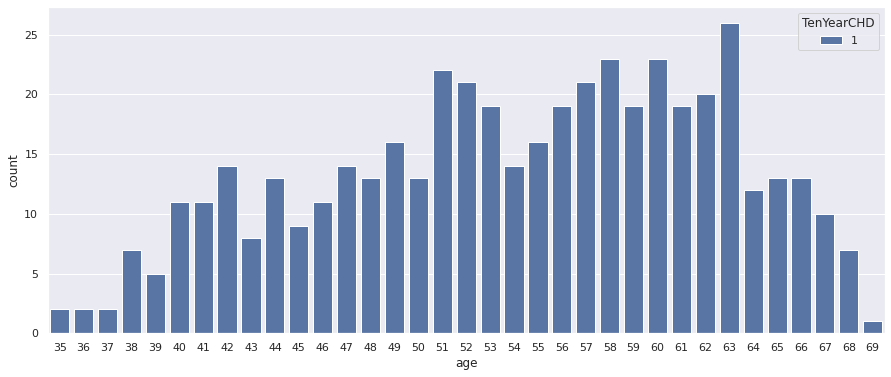

In [ ]:
#Number of positive cases with respect to age
positive_cases = df[df['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD')

The people with the highest risk of developing CHD are between the ages of 51 and 63

Text(0.5, 1.0, 'People haing diabetes or Not ')

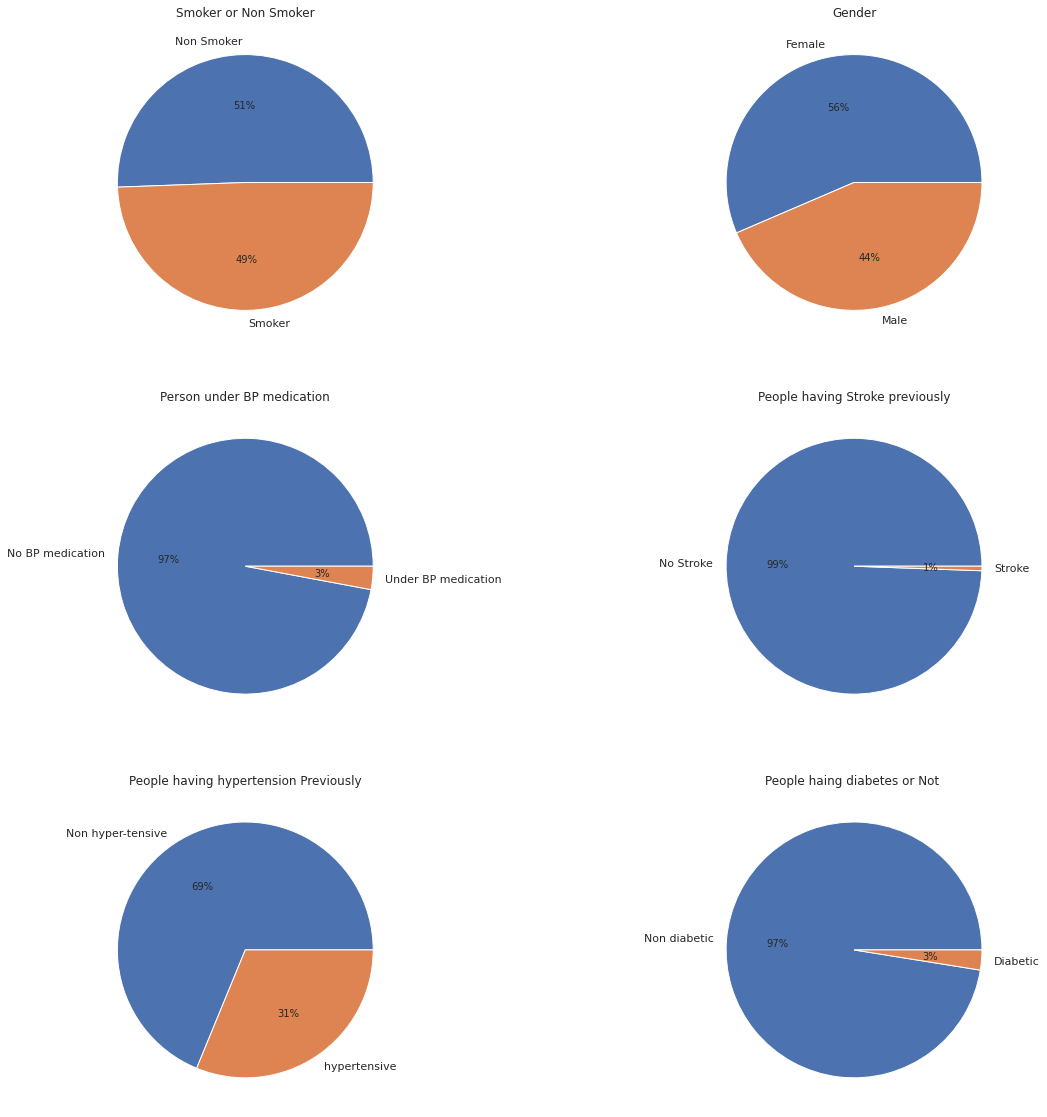

In [ ]:
# Countplots of categorical features
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
labels = 'Non Smoker','Smoker'
plt.pie(df['is_smoking'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Smoker or Non Smoker")

plt.subplot(3,2,2)
labels = 'Female','Male'
plt.pie(df['sex'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Gender")

plt.subplot(3,2,3)
labels = 'No BP medication',"Under BP medication"
plt.pie(df['BPMeds'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Person under BP medication")

plt.subplot(3,2,4)
labels = 'No Stroke','Stroke'
plt.pie(df['prevalentStroke'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("People having Stroke previously")

plt.subplot(3,2,5)
labels = 'Non hyper-tensive','hypertensive'
plt.pie(df['prevalentHyp'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("People having hypertension Previously")

plt.subplot(3,2,6)
labels = 'Non diabetic','Diabetic'
plt.pie(df['diabetes'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("People haing diabetes or Not ")


Observations from the above pie plots:

* There are an equal number of smokers and non-smokers in the dataframe 
* The number of females is higher than the number of males in the dataframe.
* A very small number of people on blood pressure medication are represented in the data.
* Only 1% of those in the data had previously smoked.
* The majority of the people in the data are non-hypertensive.
* and the majority of the people in the data are non-diabetic.s



<Figure size 720x720 with 0 Axes>

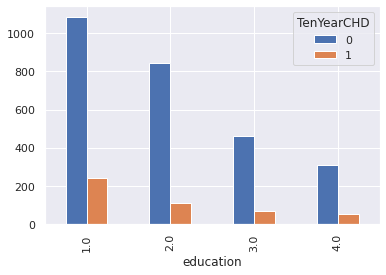

<Figure size 720x720 with 0 Axes>

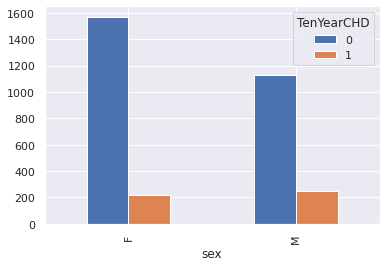

<Figure size 720x720 with 0 Axes>

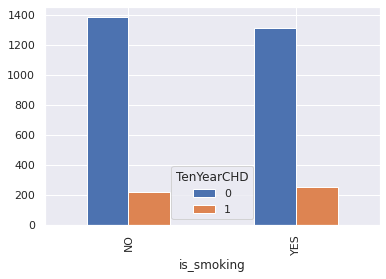

<Figure size 720x720 with 0 Axes>

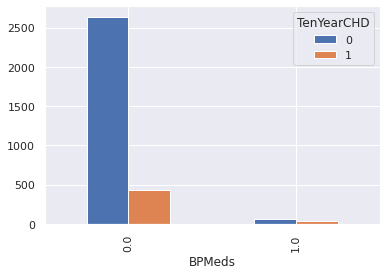

<Figure size 720x720 with 0 Axes>

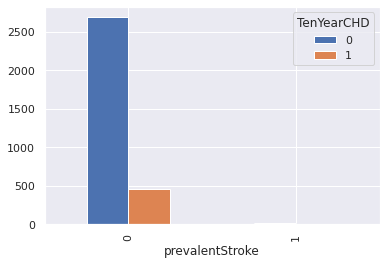

<Figure size 720x720 with 0 Axes>

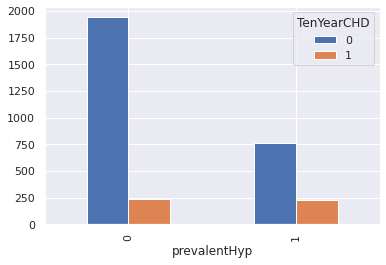

<Figure size 720x720 with 0 Axes>

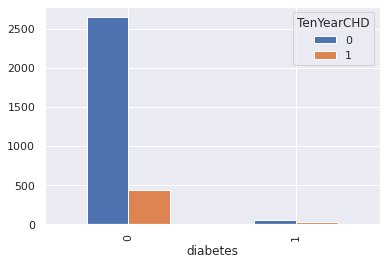

In [ ]:
# Ten Year CHD count on different categorical variables
categorical_features = ["education","sex","is_smoking","BPMeds","prevalentStroke","prevalentHyp","diabetes"]
for feature in categorical_features:
  plt.figure(figsize=(10,10))
  counts = df.groupby(feature)["TenYearCHD"].value_counts().unstack()
  counts.plot(kind = "bar")

Observtions from the above plots:
* The number of data decreases as the education class increases.
* More Males are prone to cardio vascular risk than females.
* Smoking increases the cardiovascular disease risk.
* The data contains more number of people who donot have any BP medications. However the people with BP medications are more prone to th cardio vascular risk.
* Hypertensive people are more proned to cardiovascular risks.
* The are more number of non diabetic people in the data frame. However the diabetic people are having higher cardiovascular risk.

### Feature Engineering

As we know that there are some categorical string variables in the data that needs to be converted into numerical variable that can be passed into th ML modelsfor further analysis.

#### One-Hot Encoding

Let us conduct one-hot encoding on the gender feature which will hence produce two new fetaures with the values based on the gender value.

In [ ]:
# getdummies method to perform the one-hot encoding
df = pd.get_dummies(data = df, columns= ["sex"])

#### Label Encoding

The is_smoking feature can undergo label encoding with "No" as 0 as"Yes" as 1.

In [ ]:
# Label encoing using catcodes 
df["is_smoking"] = df["is_smoking"].astype("category")
df["is_smoking"] = df["is_smoking"].cat.codes

In [ ]:
# Dataframe after encoding
df

,id,age,education,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M
1,1,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1
2,2,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0
3,3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
4,4,64,1.0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0
5,5,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0,1,0
3385,3385,60,1.0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1,0
3386,3386,46,1.0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1,0
3387,3387,44,3.0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,0,1


###Determine Correlation

#### VIF

In [ ]:
# Importing the necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

            feature         VIF
0                id    1.006520
1               age    1.407889
2         education    1.056832
3        is_smoking    2.709769
4        cigsPerDay    2.878372
5            BPMeds    1.110266
6   prevalentStroke    1.020400
7      prevalentHyp    2.052071
8          diabetes    1.600011
9           totChol    1.123937
10            sysBP    3.735104
11            diaBP    2.883247
12              BMI    1.244737
13        heartRate    1.090752
14          glucose    1.623914
15       TenYearCHD    1.108290
16            sex_F  113.161941
17            sex_M   88.086621


#### Heatmap

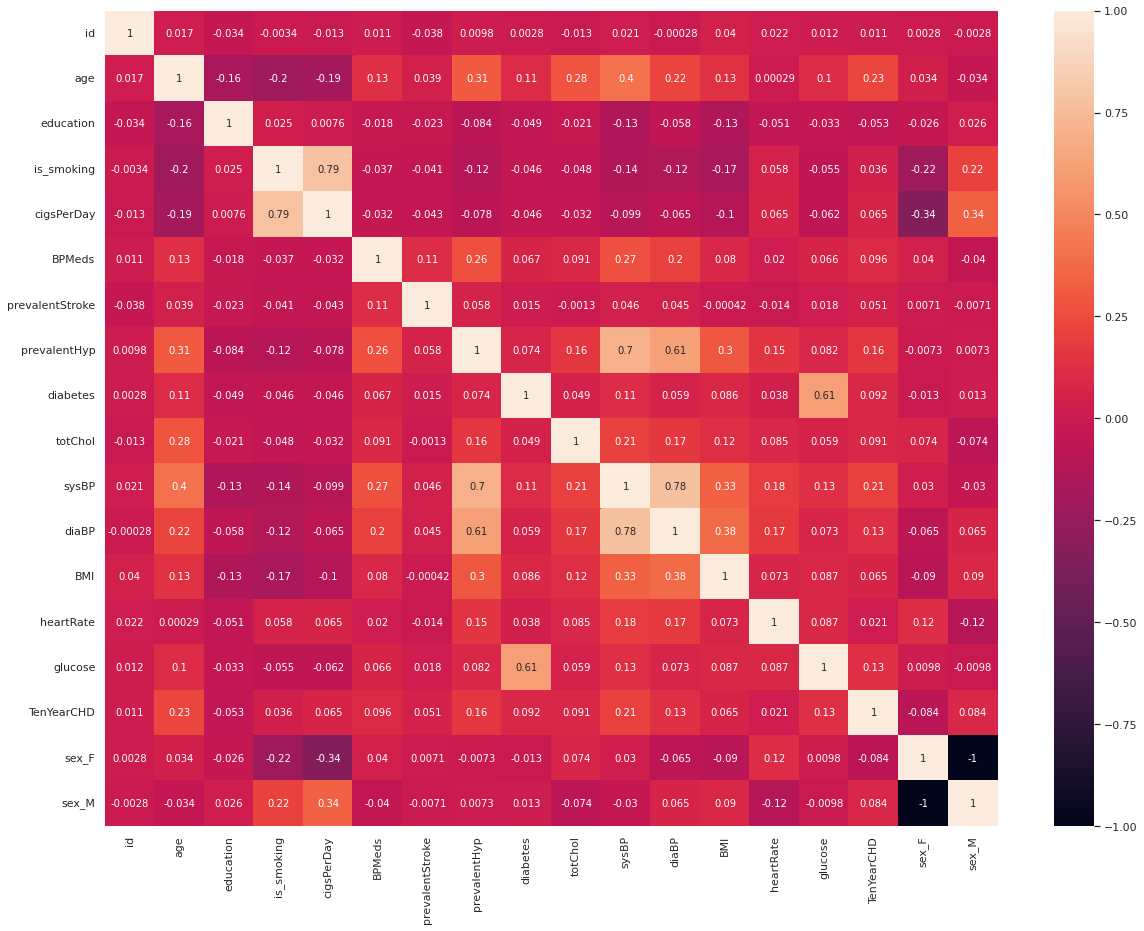

In [ ]:
#Heatmap
cor = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(cor,annot = True)

From the above VIF FActors and Heatmap, the following insights regarding multicollinearity were determined:
* Glucose and Diabetes features have some collinearity and hence dropping the Diabetes features. This is expected as the first feature is numerical and the second is the categorical representation of the amount of blood sugar level.
* is_smoking and cigsperday are highly collinear to each other and hence dropping the is_smoking feature. This is expected because the first feature is categorical and the second feature is the numerical representation of the smoking behavior of the person.
* sysBP and diaBP are highly correlated with each other as well as with prevalent hyp so forming a new feature called Pulse Pressure. Where Pulse Pressure = sysBP - diaBP.
* The newly formed sex features are having high negative collinearity due to Label encoding.

In [ ]:
# Dropping the highly collinear features and creating the new feature
df.drop(["is_smoking","diabetes"], axis = 1, inplace = True )
df["pulsePressure"] = df["sysBP"]-df["diaBP"]
df.drop(["sysBP","diaBP"], axis = 1, inplace = True )
df.drop(["id"], axis =1 , inplace = True)

### Class Imbalance

From the above data analysis, we got to know that the dependent variable has some class imbalance where the class with 0 has higher count than calss with 1. This imbalnce in count needs to be dealed with necessary imbalance handling libraries.

We will be applying SMOTE (Synthetic Minority Oversampling Technique). This technique generates synthetic data for the minority class.

In [ ]:
# Importing the necessary library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
# Dependent and independent variables
y= df["TenYearCHD"]
x= df.drop(["TenYearCHD"], axis = 1)

In [ ]:
# fit predictor and target variable
x, y = smote.fit_resample(x, y)

Text(0.5, 1.0, 'TenYearCHD counts after SMOTE')

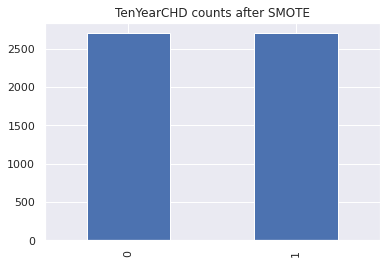

In [ ]:
# Plotting the value counts after smote
y.value_counts().plot(kind = "bar")
plt.title("TenYearCHD counts after SMOTE")

After Applying SMOTE on the dataframe we are having an equal count of both the classes present in the Ten YearCHD. This data will be helpful for better model building 

### Train Test Split

Let us split the data to train and test the data. This will help us to compare the model performance both and training and testing datas, which will help us to do the comparison on the different model will we will build on this data.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state= 42)

### Feature Scaling

From the above data analysis we got to know that the features present in the data frame consists values with different scales. Hence to obtain a uniform scaling in the data we will be using the "MinMaxScaler" offered by Sklearn.

In [ ]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Scaling the data
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

### Model Selection

From all the above steps we obtained a clean data which we can deal with further model building.
Since we are dealing with a classifiation problm we will be using various classification machine learning models which will help us to achieve our objective on predicting the cardiovascular risk.

In [ ]:
#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Model Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [ ]:
# List of models
models = [["Logistic Regression", LogisticRegression()], ["DecisionTree", DecisionTreeClassifier()], ["GradientBoosting",GradientBoostingClassifier()],
          ["XGBoost", XGBClassifier()],["RandomForest", RandomForestClassifier()], ["KNN", KNeighborsClassifier()], ["SVM",SVC(probability = True)],["Naive Bias", GaussianNB()]]

In [ ]:
def buildModel(xtrain,xtest,ytrain,ytest, models):

  """
  This function builds the classification models using the traing and testing datas passed as arguments
  and returns the respective model metrics, confusion matrices and the roc curve values.
  Paramaters:
  xtrain, xtest, ytrain and ytest as pandas dataframe or numpy ndarray
  models: A list with model name and the model class. 
  """
  # creating a list to store the results of diffrent models
  model_result = []
  # dictionary for roc curve
  Curve = {}
  for modelname, method in models:
    # creating a dictionary to store the current model result
    current_result = dict()
    #Trainig and testing the models
    model = method
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ytrainpred = model.predict(xtrain)
    ypredProb = model.predict_proba(xtest)
    # Model metrics 
    current_result["Model"] = modelname
    current_result["Train Accuracy"] = accuracy_score(ytrain,ytrainpred)
    current_result["Test Accuracy"] = accuracy_score(ytest,ypred)
    current_result["Train Precision"] = precision_score(ytrain,ytrainpred)
    current_result["Test Precision"] = precision_score(ytest,ypred)
    current_result["Train Recall"] = recall_score(ytrain, ytrainpred)
    current_result["Test Recall"] = recall_score(ytest, ypred)
    current_result["Train F1"] = f1_score(ytrain, ytrainpred)
    current_result["Test F1"] = f1_score(ytest, ypred)
    current_result["Train ROC_AUC Score"] = roc_auc_score(ytrain,ytrainpred)
    current_result["Test ROC_AUC Score"] = roc_auc_score(ytest,ypred)
    model_result.append(current_result)
    # Confusion Matrices
    cm_train = confusion_matrix(ytrain,ytrainpred)
    display_train_cm = ConfusionMatrixDisplay(confusion_matrix = cm_train , display_labels= model.classes_)

    cm_test = confusion_matrix(ytest,ypred)
    display_test_cm = ConfusionMatrixDisplay(confusion_matrix = cm_test , display_labels= model.classes_)
    
    #Plot the confusion matrix
    plt.figure(figsize=(10,10))
    display_train_cm.plot()
    plt.grid(False)
    display_train_cm.ax_.set_title(f"{modelname} Train Confusion matrix")
    plt.figure(figsize=(10,10))
    display_test_cm.plot()
    plt.grid(False)
    display_test_cm.ax_.set_title(f"{modelname} Test Confusion matrix")

    # ROC Curve values
    fpr, tpr, _ = roc_curve(ytest, ypredProb[:,1])
    Curve[modelname] = (fpr,tpr)
  model_result =pd.DataFrame(model_result)
  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(ytest))]
  p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)
  Curve["TPR = FPR"] = (p_fpr, p_tpr)
  return model_result , Curve

<Figure size 720x720 with 0 Axes>

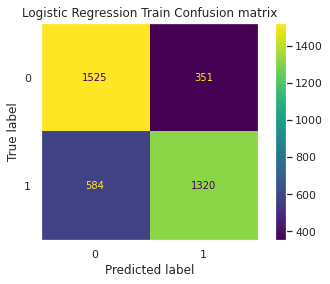

<Figure size 720x720 with 0 Axes>

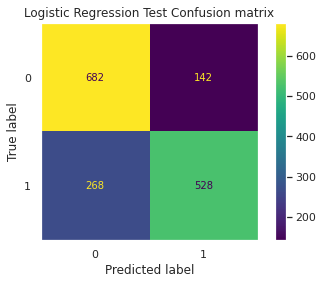

<Figure size 720x720 with 0 Axes>

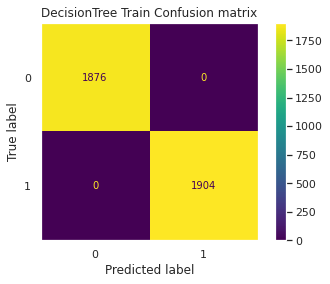

<Figure size 720x720 with 0 Axes>

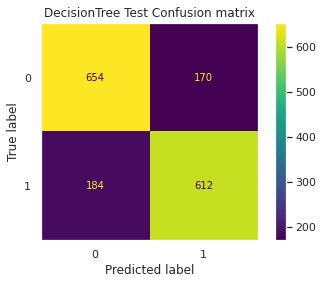

<Figure size 720x720 with 0 Axes>

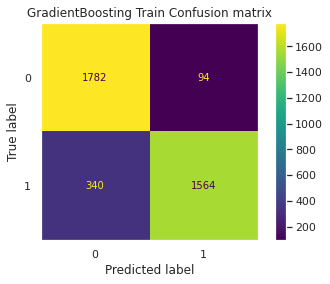

<Figure size 720x720 with 0 Axes>

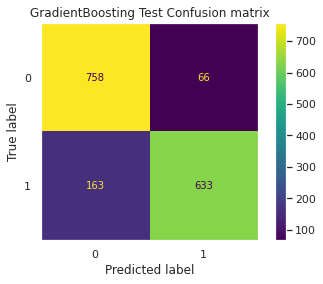

<Figure size 720x720 with 0 Axes>

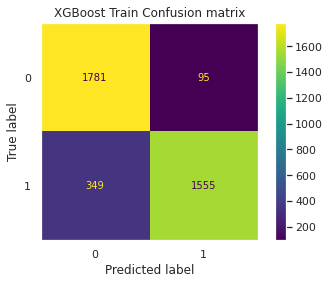

<Figure size 720x720 with 0 Axes>

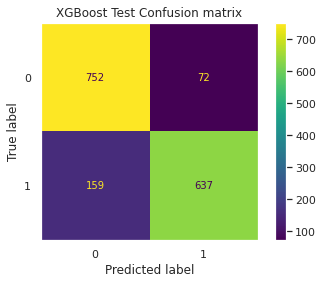

<Figure size 720x720 with 0 Axes>

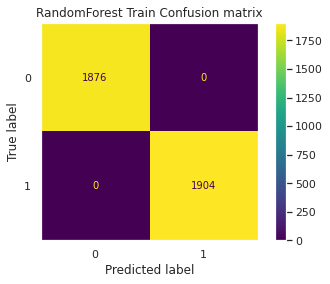

<Figure size 720x720 with 0 Axes>

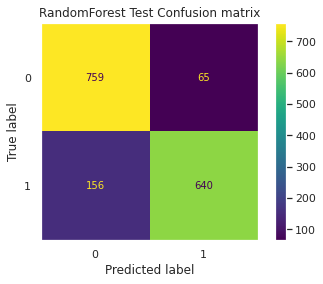

<Figure size 720x720 with 0 Axes>

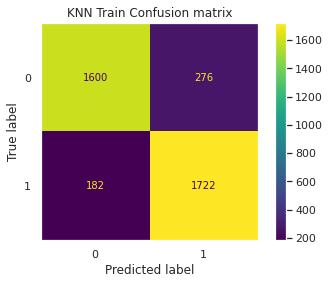

<Figure size 720x720 with 0 Axes>

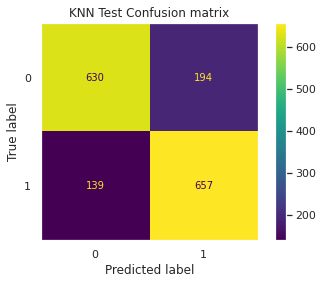

<Figure size 720x720 with 0 Axes>

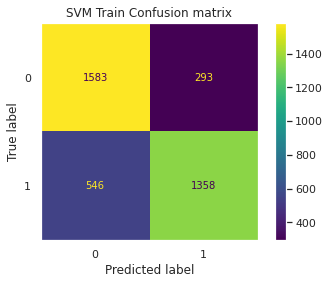

<Figure size 720x720 with 0 Axes>

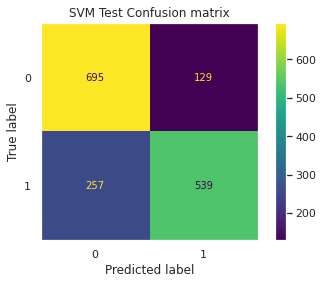

<Figure size 720x720 with 0 Axes>

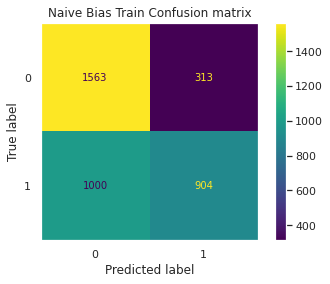

<Figure size 720x720 with 0 Axes>

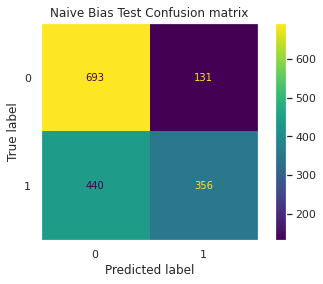

In [ ]:
# Obtaining results
model_results, Curve = buildModel(xtrain,xtest,ytrain,ytest, models)

Random Forest, XGBoost, Gradient Boosting models have outperformed other models in prediction of "class 1" which is the required class for predicting the TenYearCHD.

Random Forest model have very less number of false negative values followed by KNN, XGBoosting and GradientBoosting. 

In [ ]:
# Model metrics values
model_results

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train ROC_AUC Score,Test ROC_AUC Score
0,Logistic Regression,0.752646,0.746914,0.789946,0.788060,0.693277,0.663317,0.738462,0.720327,0.753089,0.745493
1,DecisionTree,1.000000,0.781481,1.000000,0.782609,1.000000,0.768844,1.000000,0.775665,1.000000,0.781267
2,GradientBoosting,0.885185,0.858642,0.943305,0.905579,0.821429,0.795226,0.878158,0.846823,0.885661,0.857565
3,XGBoost,0.882540,0.857407,0.942424,0.898449,0.816702,0.800251,0.875070,0.846512,0.883031,0.856436
4,RandomForest,1.000000,0.863580,1.000000,0.907801,1.000000,0.804020,1.000000,0.852765,1.000000,0.862568
5,KNN,0.878836,0.794444,0.861862,0.772033,0.904412,0.825377,0.882624,0.797814,0.878645,0.794970
6,SVM,0.778042,0.761728,0.822532,0.806886,0.713235,0.677136,0.763994,0.736339,0.778526,0.760291
7,Naive Bias,0.652646,0.647531,0.742810,0.731006,0.474790,0.447236,0.579302,0.554949,0.653973,0.644128


Let us visualize the ROC-Auc curves of these models

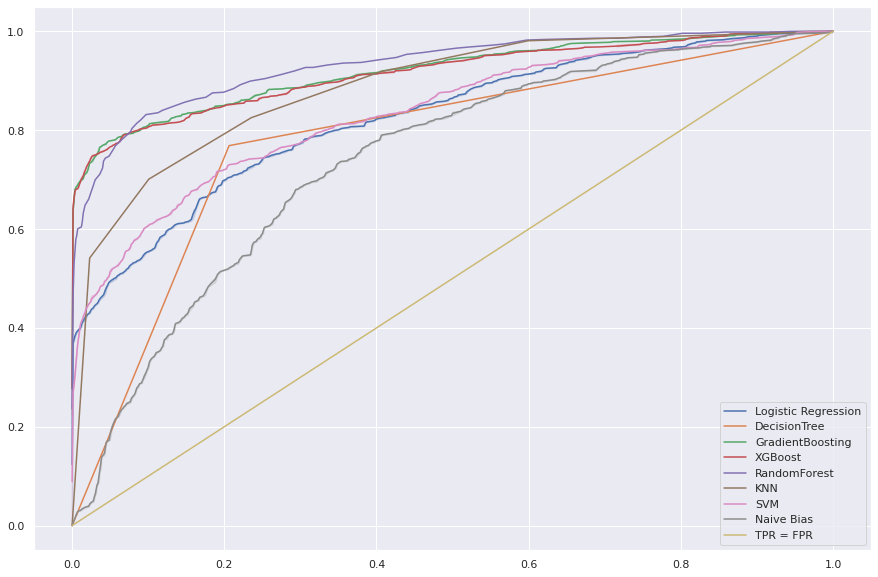

In [ ]:
# ROC_AUC curve
plt.figure(figsize = (15,10))
for model , value in Curve.items():
  sns.lineplot(value[0],value[1], label = model)

The following insights were obtained from the above model building and testing:

*  Random Forest, GradientBoosting and XGBoost Classifiers are the top 3 classification models that outperforms other models when we try to compare the model metrics
* Logistic regression, KNN and SVM too perform well, but these models require a lot of improvement when compared to the top 3 models which we have selected.
* Descision Tree model performs very well on the training data, but when it comes to testing data the performance is poor. This hints us the presence of overfitting in this model.
* The Naive Bayes model is the worst performing model for the given data frame.
* Random Forest has the highest Area under the ROC curve followed by Gradient Boosting and XGBoosting. 


### Hyper Parameter Tuning

From the Model building and testing we have picked the 3 models (RandomForest, XGBoost and GradientBoosting) for further hyperparameter tuning.

By Performing hyperparameter tuning we could try to improve the performance of these selected ML Models.

To acheive this we would be using "GridSearchCV" library offered in Scikit-learn.

In [ ]:
def HPTuning(model, hyperparameters):
  
  """
  This function obtains the list of models and hyperparameters as arugments,
  performs hyperparameter tuning and 
  returns the necessary classification metrics, Confusion matrix values for the given model

  Parameters:
  model: A list with model name and model class
  hyperparameters: A dictionary of hyperparameters with its list of possible values
  """
  # List to store the metrics values after tuning
  tuning_results = []
  from sklearn.model_selection import GridSearchCV
  for modelname, modelMethod in model:
    CV = GridSearchCV(estimator = modelMethod, param_grid = hyperparameters, cv = 5, scoring= "roc_auc" )
    CV_result = dict()
    CV_result["Model"] = modelname
    CV.fit(xtrain, ytrain) # training the best model
    best_estimator = CV.best_estimator_
    bestPred = best_estimator.predict(xtest) # Testing the model
    bestTrainPred = best_estimator.predict(xtrain)
    #Model metrics
    CV_result["Train Accuracy"] = accuracy_score(ytrain,bestTrainPred)
    CV_result["Test Accuracy"] = accuracy_score(ytest,bestPred)
    CV_result["Train Precision"] = precision_score(ytrain,bestTrainPred)
    CV_result["Test Precision"] = precision_score(ytest,bestPred)
    CV_result["Train Recall"] = recall_score(ytrain, bestTrainPred)
    CV_result["Test Recall"] = recall_score(ytest, bestPred)
    CV_result["Train F1"] = f1_score(ytrain, bestTrainPred)
    CV_result["Test F1"] = f1_score(ytest, bestPred)
    CV_result["Train ROC_AUC Score"] = roc_auc_score(ytrain,bestTrainPred)
    CV_result["Test ROC_AUC Score"] = roc_auc_score(ytest,bestPred)

    tuning_results.append(CV_result)

    # Confusion Matrix
    best_cm_train = confusion_matrix(ytrain,bestTrainPred)
    best_cm_Test  = confusion_matrix(ytest, bestPred)

    # best parameters
    best_params = CV.best_params_
  
  tuning_results = pd.DataFrame(tuning_results)
  return tuning_results ,best_params, best_cm_train, best_cm_Test

In [ ]:
# XGBoost Hyperparameters
XgboostModel = [["XgBoost", XGBClassifier(random_state=42)]]
XgBoostParms = {'n_estimators' : [300,350,375],'max_depth': [7,8,9,10],'learning_rate': [0.01, 0.001,0.02], 'subsample': [0.5,0.6]}

In [ ]:
XGB_Result,XG_Best_Params, XGB_Train_Cm , XGB_Test_CM = HPTuning(XgboostModel,XgBoostParms)

In [ ]:
#XGBoost Results After Hyperparameter tuning
XGB_Result

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train ROC_AUC Score,Test ROC_AUC Score
0,XgBoost,0.995503,0.864815,1.0,0.888291,0.991071,0.829146,0.995516,0.8577,0.995536,0.864209


In [ ]:
#XGBoost Parameters After Hyperparameter tuning
XG_Best_Params

{'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 375, 'subsample': 0.6}

Text(0.5, 1.0, 'XGBoost Taining Confusion Matrix (after Hyperparameter Tuning)')

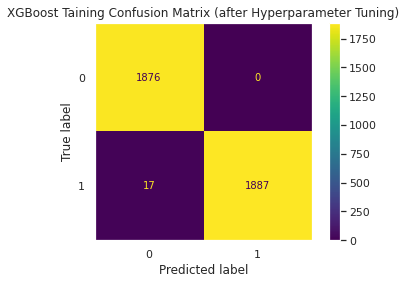

In [ ]:
#XGBoost Training Confusion After Hyperparameter tuning
XGB_Train_CM_Display =  ConfusionMatrixDisplay(confusion_matrix = XGB_Train_Cm)
XGB_Train_CM_Display.plot()
plt.grid(False)
plt.title("XGBoost Taining Confusion Matrix (after Hyperparameter Tuning)")

Text(0.5, 1.0, 'XGBoost Testing Confusion Matrix (after Hyperparameter Tuning)')

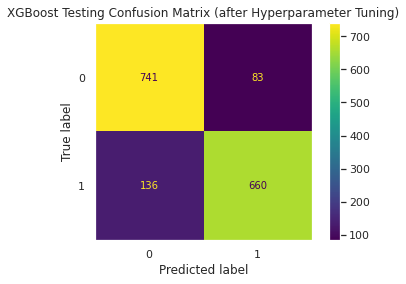

In [ ]:
#XGBoost Testing Confusion After Hyperparameter tuning
XGB_Test_CM_Display =  ConfusionMatrixDisplay(confusion_matrix = XGB_Test_CM)
XGB_Test_CM_Display.plot()
plt.grid(False)
plt.title("XGBoost Testing Confusion Matrix (after Hyperparameter Tuning)")

In [ ]:
# Hyperparameters for GradientBoosting
GradientBoostingModel = [["GradientBoosting", GradientBoostingClassifier(random_state=42)]]
GradientBoostingParams = {'n_estimators' : [300,350,375],'max_depth': [7,8,9,10],'learning_rate': [0.01, 0.001,0.02], 'subsample': [0.5,0.6]}

In [ ]:
GradientBoosting_Result,GradientBoosting_Best_Params, GradientBoosting_Train_Cm , GradientBoosting_Test_CM = HPTuning(GradientBoostingModel,GradientBoostingParams)

In [ ]:
#GradientBoosting Results After Hyperparameter tuning
GradientBoosting_Result

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train ROC_AUC Score,Test ROC_AUC Score
0,GradientBoosting,1.0,0.875926,1.0,0.903664,1.0,0.836683,1.0,0.868885,1.0,0.875259


In [ ]:
#GradientBoosting Parameters After Hyperparameter tuning
GradientBoosting_Best_Params

{'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 375, 'subsample': 0.6}

Text(0.5, 1.0, 'GradientBoosting Taining Confusion Matrix (after Hyperparameter Tuning)')

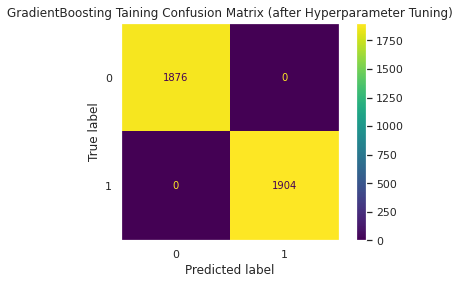

In [ ]:
#GradientBoosting Training Confusion After Hyperparameter tuning
GradientBoosting_Train_CM_Display =  ConfusionMatrixDisplay(confusion_matrix = GradientBoosting_Train_Cm)
GradientBoosting_Train_CM_Display.plot()
plt.grid(False)
plt.title("GradientBoosting Taining Confusion Matrix (after Hyperparameter Tuning)")

Text(0.5, 1.0, 'GradientBoosting Testing Confusion Matrix (after Hyperparameter Tuning)')

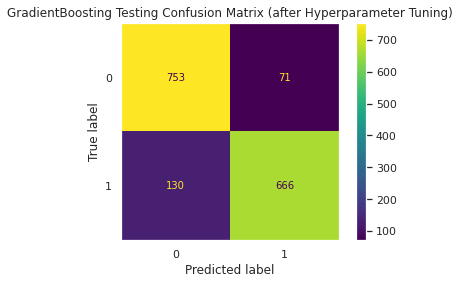

In [ ]:
#GradientBoosting Testing Confusion After Hyperparameter tuning
GradientBoosting_Test_CM_Display =  ConfusionMatrixDisplay(confusion_matrix = GradientBoosting_Test_CM)
GradientBoosting_Test_CM_Display.plot()
plt.grid(False)
plt.title("GradientBoosting Testing Confusion Matrix (after Hyperparameter Tuning)")

In [ ]:
# Hyperparameters for RandomForest
RandomForestModel = [["RandomForest", RandomForestClassifier(random_state = 42)]]
RandomForestParams = {'n_estimators':[300, 350, 375], 'max_depth': [8,9,10,12], 'max_features': ["auto", "sqrt", "log2"]}

In [ ]:
RandomForest_Result,RandomForest_Best_Params, RandomForest_Train_Cm , RandomForest_Test_CM = HPTuning(RandomForestModel,RandomForestParams)

In [ ]:
#RandomForest Results After Hyperparameter tuning
RandomForest_Result

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train ROC_AUC Score,Test ROC_AUC Score
0,RandomForest,0.988624,0.851852,0.986918,0.885042,0.990546,0.802764,0.988729,0.841897,0.98861,0.851018


In [ ]:
#RandomForest Parameters After Hyperparameter tuning
RandomForest_Best_Params

{'max_depth': 12, 'max_features': 'auto', 'n_estimators': 300}

Text(0.5, 1.0, 'RandomForest Taining Confusion Matrix (after Hyperparameter Tuning)')

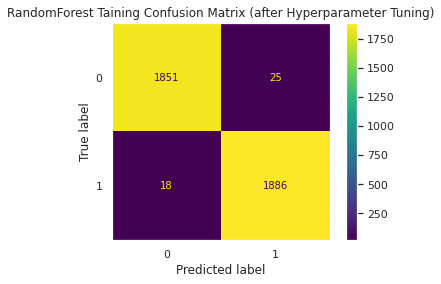

In [ ]:
#RandomForest Training Confusion After Hyperparameter tuning
RandomForest_Train_CM_Display =  ConfusionMatrixDisplay(confusion_matrix = RandomForest_Train_Cm)
RandomForest_Train_CM_Display.plot()
plt.grid(False)
plt.title("RandomForest Taining Confusion Matrix (after Hyperparameter Tuning)")

Text(0.5, 1.0, 'RandomForest Testing Confusion Matrix (after Hyperparameter Tuning)')

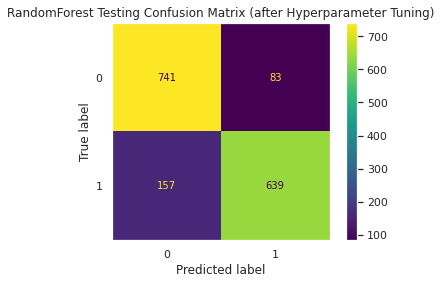

In [ ]:
#RandomForest Testing Confusion After Hyperparameter tunin
RandomForest_Test_CM_Display =  ConfusionMatrixDisplay(confusion_matrix = RandomForest_Test_CM)
RandomForest_Test_CM_Display.plot()
plt.grid(False)
plt.title("RandomForest Testing Confusion Matrix (after Hyperparameter Tuning)")

From the HyperParameter Tuning:
* The GradientBoosting Models provided us a good result compared to the other models which were considered for the HyperParameter tuning
* Tuning the hyperparameter yielded in increase in "Claas 1" prediction by the model, which is necessary for the CardioVascular disease prediction
* However the Hyperparameter tuning did not yield a better results for the Random Forest Model and we can see a decrease in the performance of the model after this tuning is performed.

### Feature Importance

Model Explainablity heps to to find out the features that have very high Impact on the dependendent variable and hence more importance can be given to those variables foer further Analysis.

In our project we will be using Shapley Additive Explanations (SHAP) to explain the GradientBoosting ensemble model, and we will find out the features of high importance for the model performance.

In [ ]:
# Fitting the GradientBoosting Model obtained from Hyperparameter Tuning
GBModel = GradientBoostingClassifier(random_state=42, max_depth = 10, learning_rate = 0.02, n_estimators = 375, subsample = 0.5 )
GBModel.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.02, max_depth=10, n_estimators=375,
                           random_state=42, subsample=0.5)

In [ ]:
# installing SHAP
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.7 MB/s 


In [ ]:
# Import SHAP
import shap

In [ ]:
Shap_Xtrain = pd.DataFrame(xtrain, columns= x.columns)

In [ ]:
Shap_Xtest = pd.DataFrame(xtest, columns= x.columns)

In [ ]:
#obtain SHAP values for different features
shap_values = shap.TreeExplainer(GBModel).shap_values(Shap_Xtest)

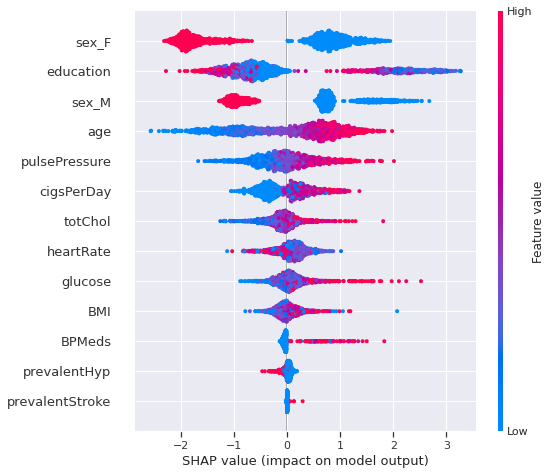

In [ ]:
# Scatter plot of SHAP values and Feature importance
shap.summary_plot(shap_values[0:], Shap_Xtest)

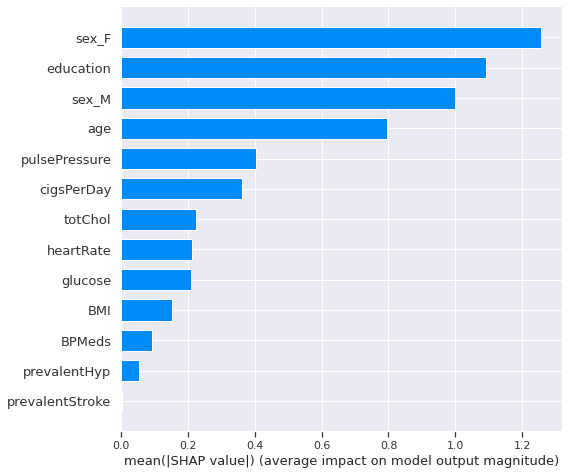

In [ ]:
# Feature importance using SHAP Values
shap.summary_plot(shap_values, Shap_Xtrain, plot_type="bar")

From the above feature importance plots we got to know:

* Gender, Education, age, PulsePressure are the feature with very high importance.
* Toatal cholestrol, Heart Rate, Glucose level shares almost equal importance. 



### Conclusion


From the data analysis and Machine learning Model building, following insights were obtained:

* People of age between 51 to 63 are more proned to CardioVascular diseases.
* Males are more likely to have cardio vascular diseases than females.
* Smoking cigerates increases the risk of cardio vascular diseases.
* Hypertensive people are more proned to cardiovascular risks
* Gradient Boosting model was ultimately selected as the Machine Learning Model to perform the cardiovascular risk predictions, as it out performs all other considered ML models after hyperparameter tuning.
* From the SHAP model explainer we got to know that Gender, Education, age, PulsePressure are the feature with very high importance for the current selected ML model. 